In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [104]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [105]:
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['sex'] = df['sex'].map({'Female': 1, 'Male': 0})
df['time'] = df['time'].map({'Dinner': 1, 'Lunch': 0})

In [106]:
correlation = df['total_bill'].corr(df['tip'])
print('Pearson Korelasyon Katsayısı:', correlation)

Pearson Korelasyon Katsayısı: 0.6757341092113646


In [107]:
correlation = df['size'].corr(df['tip'])
print('Pearson Korelasyon Katsayısı:', correlation)

Pearson Korelasyon Katsayısı: 0.48929877523035725


In [108]:
day_mapping = {
    'Sun': 0,
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thur': 4,
    'Fri': 5,
    'Sat': 6
}

df['day'] = df['day'].map(day_mapping)

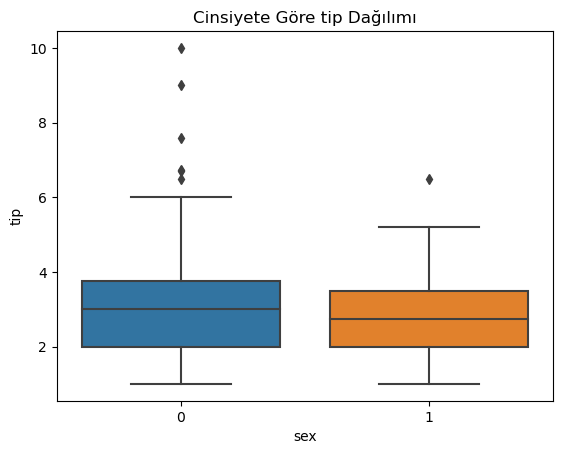

In [109]:
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Cinsiyete Göre tip Dağılımı')
plt.show()

In [110]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(df.T)

cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=df.columns, columns=df.columns)

print(cosine_sim_df)

            total_bill       tip       sex    smoker       day      time  \
total_bill    1.000000  0.944394  0.497129  0.590824  0.726212  0.814379   
tip           0.944394  1.000000  0.512555  0.562714  0.717670  0.798285   
sex           0.497129  0.512555  1.000000  0.366871  0.539092  0.420230   
smoker        0.590824  0.562714  0.366871  1.000000  0.603982  0.547142   
day           0.726212  0.717670  0.539092  0.603982  1.000000  0.651343   
time          0.814379  0.798285  0.420230  0.547142  0.651343  1.000000   
size          0.940665  0.922960  0.536179  0.542828  0.731256  0.815606   

                size  
total_bill  0.940665  
tip         0.922960  
sex         0.536179  
smoker      0.542828  
day         0.731256  
time        0.815606  
size        1.000000  


In [111]:
df['combined_feature'] = df['size'] * df['total_bill']
df = df.drop(columns=['size'])
df = df.drop(columns=['total_bill'])

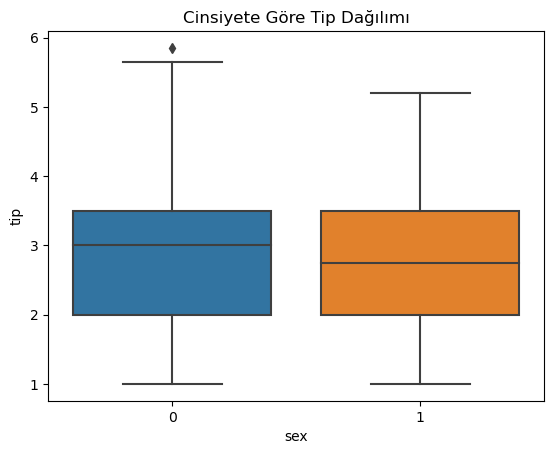

In [112]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_tip = df['tip'].mean()

df.loc[(df['tip'] < lower_bound) | (df['tip'] > upper_bound), 'tip'] = mean_tip

sns.boxplot(x='sex', y='tip', data=df)
plt.title('Cinsiyete Göre Tip Dağılımı')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
X = df.drop(columns=['tip'])
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = ElasticNet(alpha=0.6, l1_ratio=1, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Elastic Net MSE: {mse}')


Elastic Net MSE: 0.7521683187715449


In [114]:
df['integer_part'] = df['tip'].apply(lambda x: int(x))
df['tip'] = df['integer_part']
df = df.drop(columns=['integer_part'])
y = df['tip']

,tip,sex,smoker,day,time,combined_feature
0,1,1,0,0,1,33.98
1,1,0,0,0,1,31.02
2,3,0,0,0,1,63.03
3,3,0,0,0,1,47.36
4,3,1,0,0,1,98.36
...,...,...,...,...,...,...
239,2,0,0,6,1,87.09
240,2,1,1,6,1,54.36
241,2,0,1,6,1,45.34
242,1,0,0,6,1,35.64


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
from sklearn.svm import SVC
model = SVC(kernel='linear') 
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [118]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.46938775510204084


In [119]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_accuracy

0.30612244897959184

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_accuracy

0.5306122448979592

In [121]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_accuracy

C:\Users\HP01\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6326530612244898